# Experiment 2: Adding a Missing Indicator for Missing Values

## Installing and importing packages

In [1]:
%pip install mlflow dagshub

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27.4/27.4 MB 42.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.9/5.9 MB 67.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 258.2/258.2 kB 16.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 233.5/233.5 kB 12.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 147.8/147.8 kB 11.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 114.9/114.9 kB 8.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [2]:
import mlflow

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

from data_cleaning_utils import clean_data

set_config(transform_output="pandas")

## Connecting with dagshub

In [3]:
import dagshub
dagshub.init(repo_owner='SushrutGaikwad', repo_name='swiggy-delivery-time-prediction', mlflow=True)

‚ùó‚ùó‚ùó AUTHORIZATION REQUIRED ‚ùó‚ùó‚ùó

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=e4a8cef1-ff0a-47e3-afa7-97961d5f18cd&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=ea1d3bdfb9f8a1fca66e5834485b84b21a4f9b22d4d5d658273b41d25256dcca




Accessing as SushrutGaikwad

Initialized MLflow to track repo "SushrutGaikwad/swiggy-delivery-time-prediction"

Repository SushrutGaikwad/swiggy-delivery-time-prediction initialized!

## Loading and cleaning the data

In [4]:
df = pd.read_csv("/content/swiggy.csv")
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [5]:
df = clean_data(df=df)
df.head()

rider_id   age  ratings  restaurant_latitude  restaurant_longitude  \
0   INDORES13DEL02  37.0      4.9            22.745049             75.892471   
1   BANGRES18DEL02  34.0      4.5            12.913041             77.683237   
2   BANGRES19DEL01  23.0      4.4            12.914264             77.678400   
3  COIMBRES13DEL02  38.0      4.7            11.003669             76.976494   
4   CHENRES12DEL01  32.0      4.6            12.972793             80.249982   

   delivery_latitude  delivery_longitude order_date     weather traffic  ...  \
0          22.765049           75.912471 2022-03-19       sunny    high  ...   
1          13.043041           77.813237 2022-03-25      stormy     jam  ...   
2          12.924264           77.688400 2022-03-19  sandstorms     low  ...   
3          11.053669           77.026494 2022-04-05       sunny  medium  ...   
4          13.012793           80.289982 2022-03-26      cloudy    high  ...   

   city_name   distance distance_type  order_day order_month  \
0       INDO   3.025149         short         19           3   
1       BANG  20.183530     very_long         25           3   
2       BANG   1.552758         short         19           3   
3      COIMB   7.790401        medium          5           4   
4       CHEN   6.210138        medium         26           3   

  order_day_of_week  order_day_is_weekend pickup_time_minutes  \
0          saturday                     1                15.0   
1            friday                     0                 5.0   
2          saturday                     1                15.0   
3           tuesday                     0                10.0   
4          saturday                     1                15.0   

   order_time_hour order_time_of_day  
0             11.0           morning  
1             19.0           evening  
2              8.0           morning  
3             18.0           evening  
4             13.0         afternoon  

[5 rows x 27 columns]

## Dropping unnecessary columns

We will now drop the columns that we, during EDA, identified to not affect our target significantly.

In [6]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'distance', 'distance_type',
       'order_day', 'order_month', 'order_day_of_week', 'order_day_is_weekend',
       'pickup_time_minutes', 'order_time_hour', 'order_time_of_day'],
      dtype='object')

In [7]:
cols_to_drop = [
    'rider_id',
    'restaurant_latitude',
    'restaurant_longitude',
    'delivery_latitude',
    'delivery_longitude',
    'order_date',
    'order_time_hour',
    'order_day',
    'city_name',
    'order_day_of_week',
    'order_month',
]

df.drop(columns=cols_to_drop, inplace=True)
df.head()

age  ratings     weather traffic  vehicle_condition type_of_order  \
0  37.0      4.9       sunny    high                  2         snack   
1  34.0      4.5      stormy     jam                  2         snack   
2  23.0      4.4  sandstorms     low                  0        drinks   
3  38.0      4.7       sunny  medium                  0        buffet   
4  32.0      4.6      cloudy    high                  1         snack   

  type_of_vehicle  multiple_deliveries festival      city_type  time_taken  \
0      motorcycle                  0.0       no          urban          24   
1         scooter                  1.0       no  metropolitian          33   
2      motorcycle                  1.0       no          urban          26   
3      motorcycle                  1.0       no  metropolitian          21   
4         scooter                  1.0       no  metropolitian          30   

    distance distance_type  order_day_is_weekend  pickup_time_minutes  \
0   3.025149         short                     1                 15.0   
1  20.183530     very_long                     0                  5.0   
2   1.552758         short                     1                 15.0   
3   7.790401        medium                     0                 10.0   
4   6.210138        medium                     1                 15.0   

  order_time_of_day  
0           morning  
1           evening  
2           morning  
3           evening  
4         afternoon

In [8]:
df.shape

(45502, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 0 to 45592
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   43648 non-null  float64 
 1   ratings               43594 non-null  float64 
 2   weather               44977 non-null  object  
 3   traffic               44992 non-null  object  
 4   vehicle_condition     45502 non-null  int64   
 5   type_of_order         45502 non-null  object  
 6   type_of_vehicle       45502 non-null  object  
 7   multiple_deliveries   44509 non-null  float64 
 8   festival              45274 non-null  object  
 9   city_type             44304 non-null  object  
 10  time_taken            45502 non-null  int64   
 11  distance              41872 non-null  float64 
 12  distance_type         41872 non-null  category
 13  order_day_is_weekend  45502 non-null  int64   
 14  pickup_time_minutes   43862 non-null  float64 
 15  order_t

## Checking for duplicates

In [10]:
df.duplicated().sum()

0

## Missing values

In [11]:
df.isna().sum()

age                     1854
ratings                 1908
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
distance                3630
distance_type           3630
order_day_is_weekend       0
pickup_time_minutes     1640
order_time_of_day       1640
dtype: int64

In [12]:
df.isna().sum().sum()

17756

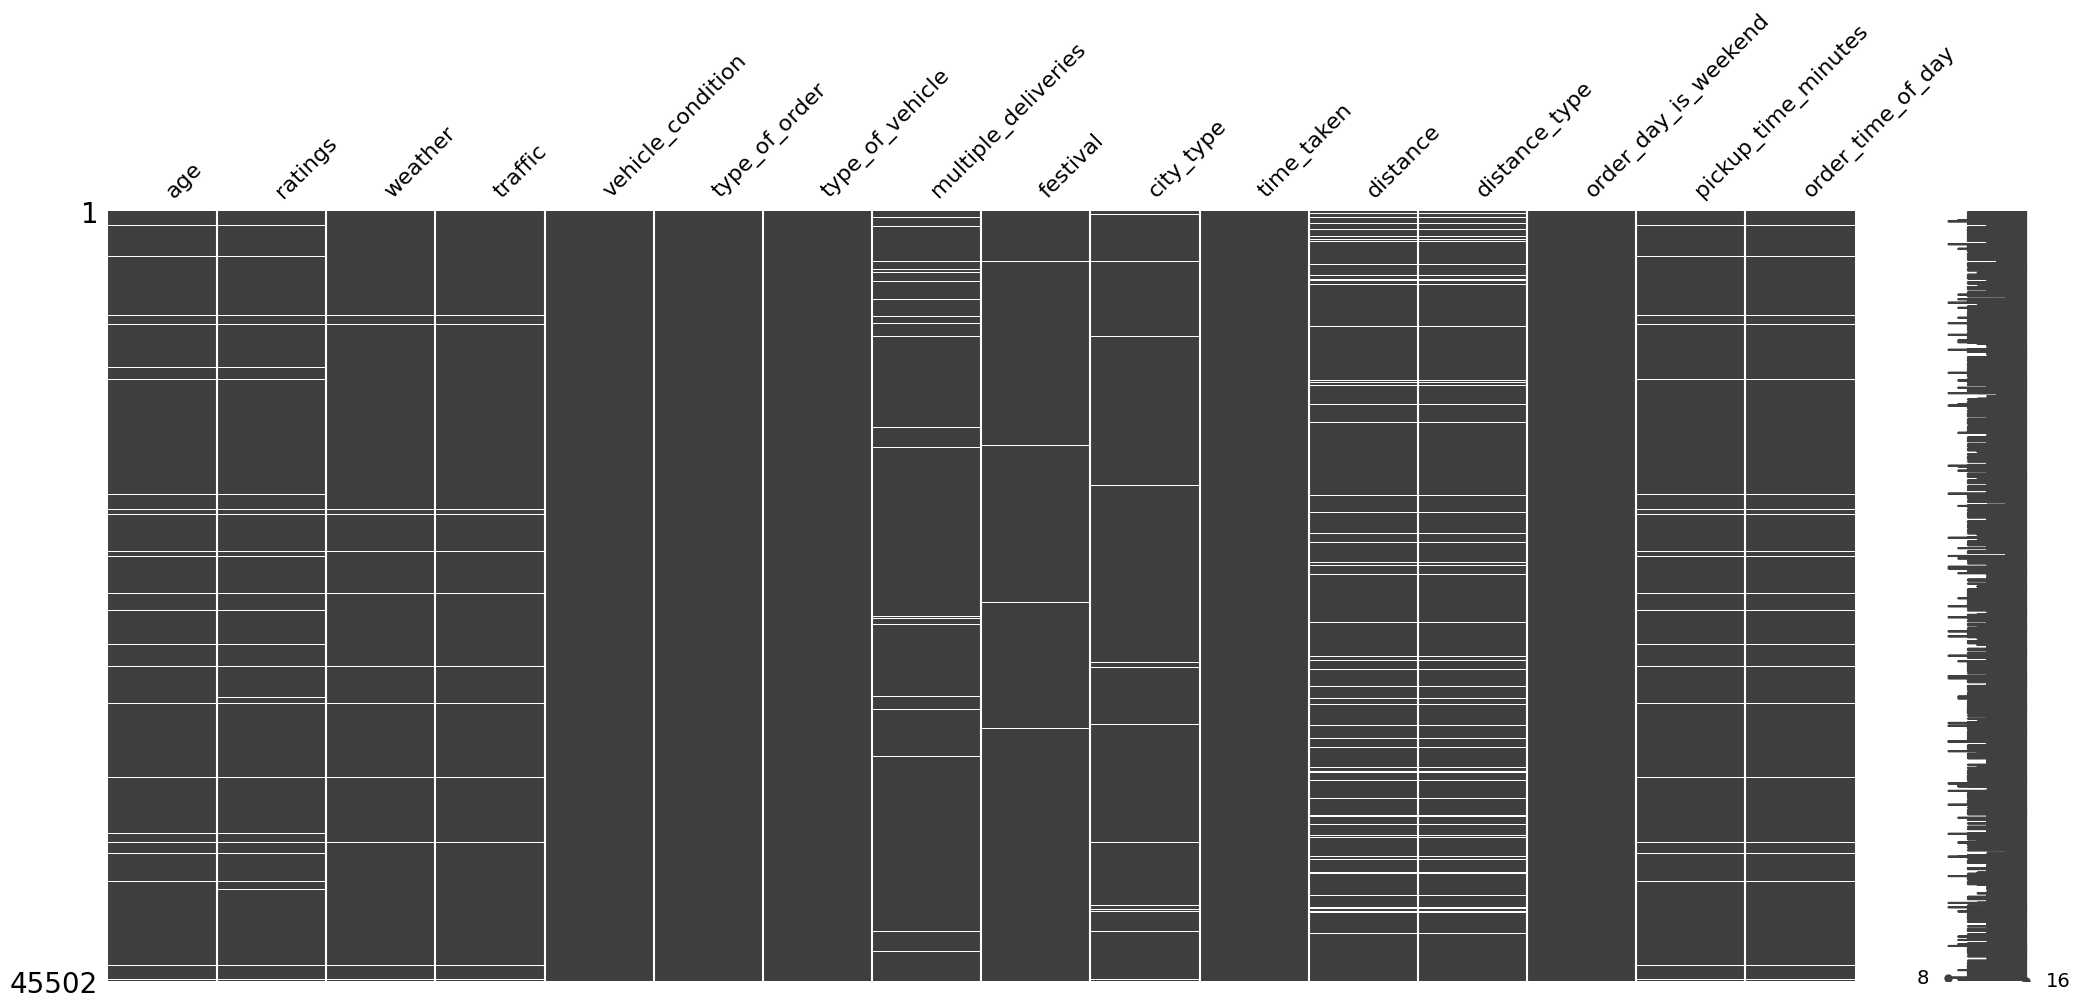

In [13]:
msno.matrix(df);

In [14]:
missing_cols = df.columns[df.isnull().any()]
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'distance', 'distance_type',
       'pickup_time_minutes', 'order_time_of_day'],
      dtype='object')

## Imputing missing values

### Input-output split

In [15]:
temp_df = df.copy()
temp_df.head()

age  ratings     weather traffic  vehicle_condition type_of_order  \
0  37.0      4.9       sunny    high                  2         snack   
1  34.0      4.5      stormy     jam                  2         snack   
2  23.0      4.4  sandstorms     low                  0        drinks   
3  38.0      4.7       sunny  medium                  0        buffet   
4  32.0      4.6      cloudy    high                  1         snack   

  type_of_vehicle  multiple_deliveries festival      city_type  time_taken  \
0      motorcycle                  0.0       no          urban          24   
1         scooter                  1.0       no  metropolitian          33   
2      motorcycle                  1.0       no          urban          26   
3      motorcycle                  1.0       no  metropolitian          21   
4         scooter                  1.0       no  metropolitian          30   

    distance distance_type  order_day_is_weekend  pickup_time_minutes  \
0   3.025149         short                     1                 15.0   
1  20.183530     very_long                     0                  5.0   
2   1.552758         short                     1                 15.0   
3   7.790401        medium                     0                 10.0   
4   6.210138        medium                     1                 15.0   

  order_time_of_day  
0           morning  
1           evening  
2           morning  
3           evening  
4         afternoon

In [16]:
X = temp_df.drop(columns=['time_taken'])
y = temp_df['time_taken']

### Train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
print(f"X_train.shape = {X_train.shape}")
print(f"X_test.shape = {X_test.shape}")

X_train.shape = (36401, 15)
X_test.shape = (9101, 15)


### Checking for missing values in the training data

In [19]:
X_train.isna().sum()

age                     1470
ratings                 1510
weather                  421
traffic                  407
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      795
festival                 188
city_type                968
distance                2931
distance_type           2931
order_day_is_weekend       0
pickup_time_minutes     1298
order_time_of_day       1298
dtype: int64

In [20]:
X_train.isna().sum().sum()

14217

In [21]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'distance', 'distance_type',
       'pickup_time_minutes', 'order_time_of_day'],
      dtype='object')

#### Percentage of missing rows in the training data

In [22]:
missing_pct = X_train.isnull().any(axis=1).mean() * 100
print(f"{missing_pct:.2f}% of rows in the training data have missing values.")

16.44% of rows in the training data have missing values.


### Transforming the target

In [23]:
pt = PowerTransformer(method='yeo-johnson')

y_train_transformed = pt.fit_transform(y_train.values.reshape(-1, 1))
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1))

### Imputation pipeline

In [24]:
num_cols = ['age', 'ratings', 'pickup_time_minutes', 'distance']

nominal_cat_cols = [
    'weather',
    'type_of_order',
    'type_of_vehicle',
    'festival',
    'city_type',
    'order_day_is_weekend',
    'order_time_of_day',
]

ordinal_cat_cols = ['traffic', 'distance_type']

In [25]:
X_train.isna().sum()

age                     1470
ratings                 1510
weather                  421
traffic                  407
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      795
festival                 188
city_type                968
distance                2931
distance_type           2931
order_day_is_weekend       0
pickup_time_minutes     1298
order_time_of_day       1298
dtype: int64

#### Getting the column names

In [26]:
features_to_fill_mode = [
    'multiple_deliveries',
    'festival',
    'city_type',
]

features_to_fill_missing_ind = [col for col in nominal_cat_cols if col not in features_to_fill_mode]
features_to_fill_missing_ind

['weather',
 'type_of_order',
 'type_of_vehicle',
 'order_day_is_weekend',
 'order_time_of_day']

#### Simple imputer column transformer

In [27]:
simple_imputer = ColumnTransformer(
    transformers=[
        ("mode_imputer", SimpleImputer(strategy="most_frequent", add_indicator=True), features_to_fill_mode),
        ("missing_ind", SimpleImputer(strategy="constant", fill_value="missing", add_indicator=True), features_to_fill_missing_ind)
    ],
    remainder="passthrough",
    n_jobs=-1,
    force_int_remainder_cols=False,
    verbose_feature_names_out=False
)

simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_ind',
                                 SimpleImputer(add_indicator=True,
                                               fill_value='missing',
                                               strategy='constant'),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'order_day_is_weekend',
                                  'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [28]:
simple_imputer.fit_transform(X_train)

multiple_deliveries festival      city_type  \
11047                 1.0       no  metropolitian   
15692                 1.0       no  metropolitian   
14499                 1.0       no  metropolitian   
29258                 1.0       no  metropolitian   
22554                 0.0       no          urban   
...                   ...      ...            ...   
11303                 0.0       no  metropolitian   
44821                 0.0       no          urban   
38234                 0.0       no  metropolitian   
860                   1.0       no  metropolitian   
15822                 0.0       no  metropolitian   

      missingindicator_multiple_deliveries missingindicator_festival  \
11047                                False                     False   
15692                                False                     False   
14499                                False                     False   
29258                                False                     False   
22554                                False                     False   
...                                    ...                       ...   
11303                                False                     False   
44821                                False                     False   
38234                                False                     False   
860                                  False                     False   
15822                                False                     False   

      missingindicator_city_type     weather type_of_order   type_of_vehicle  \
11047                      False       windy         snack  electric_scooter   
15692                      False       windy        drinks        motorcycle   
14499                      False      stormy          meal           scooter   
29258                      False       windy        buffet        motorcycle   
22554                      False  sandstorms          meal           scooter   
...                          ...         ...           ...               ...   
11303                      False  sandstorms          meal           scooter   
44821                      False      cloudy        buffet        motorcycle   
38234                      False         fog        buffet           scooter   
860                        False       windy          meal           scooter   
15822                      False      cloudy          meal        motorcycle   

      order_day_is_weekend order_time_of_day missingindicator_weather  \
11047                    0             night                    False   
15692                    0         afternoon                    False   
14499                    1           missing                    False   
29258                    0           evening                    False   
22554                    0             night                    False   
...                    ...               ...                      ...   
11303                    0           evening                    False   
44821                    0           morning                    False   
38234                    0           evening                    False   
860                      1           evening                    False   
15822                    0             night                    False   

      missingindicator_order_time_of_day   age  ratings traffic  \
11047                              False  26.0      4.7     jam   
15692                              False  21.0      4.9  medium   
14499                               True   NaN      NaN     low   
29258                              False  32.0      4.7  medium   
22554                              False  34.0      4.9     jam   
...                                  ...   ...      ...     ...   
11303                              False  29.0      4.7     jam   
44821                              False  36.0      4.8     low   
38234                              False  36.0      4.4     jam

In [29]:
simple_imputer.fit_transform(X_train).isna().sum()

multiple_deliveries                        0
festival                                   0
city_type                                  0
missingindicator_multiple_deliveries       0
missingindicator_festival                  0
missingindicator_city_type                 0
weather                                    0
type_of_order                              0
type_of_vehicle                            0
order_day_is_weekend                       0
order_time_of_day                          0
missingindicator_weather                   0
missingindicator_order_time_of_day         0
age                                     1470
ratings                                 1510
traffic                                  407
vehicle_condition                          0
distance                                2931
distance_type                           2931
pickup_time_minutes                     1298
dtype: int64

In [30]:
knn_imputer = KNNImputer(n_neighbors=5)

In [31]:
num_cols = ['age', 'ratings', 'pickup_time_minutes', 'distance']

nominal_cat_cols = [
    'weather',
    'type_of_order',
    'type_of_vehicle',
    'festival',
    'city_type',
    'order_day_is_weekend',
    'order_time_of_day',
]

ordinal_cat_cols = ['traffic', 'distance_type']

In [32]:
for col in ordinal_cat_cols:
    print(f"{col}: {X_train[col].unique()}")

traffic: ['jam' 'medium' 'low' 'high' nan]
distance_type: ['medium', 'short', 'very_long', 'long', NaN]
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']


In [33]:
traffic_order = ['low', 'medium', 'high', 'jam']
distance_type_order = ['short', 'medium', 'long', 'very_long']

#### Creating the preprocessor

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", MinMaxScaler(), num_cols),
        ("nominal_encoder", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), nominal_cat_cols),
        ("ordinal_encoder", OrdinalEncoder(categories=[traffic_order, distance_type_order], encoded_missing_value=-999, handle_unknown="use_encoded_value", unknown_value=-1), ordinal_cat_cols)
    ],
    remainder="passthrough",
    n_jobs=-1,
    force_int_remainder_cols=False,
    verbose_feature_names_out=False,
)

preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type',
                                  'order_day_is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encoder',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [35]:
preprocessor.fit_transform(X_train)

age  ratings  pickup_time_minutes  distance  weather_fog  \
11047  0.315789     0.88                  0.5  0.395429          0.0   
15692  0.052632     0.96                  0.0  0.236688          0.0   
14499       NaN      NaN                  NaN  0.004588          0.0   
29258  0.631579     0.88                  1.0  0.993990          0.0   
22554  0.736842     0.96                  0.0  0.389195          0.0   
...         ...      ...                  ...       ...          ...   
11303  0.473684     0.88                  0.0  0.563939          0.0   
44821  0.842105     0.92                  0.5  0.002839          0.0   
38234  0.842105     0.76                  0.5       NaN          1.0   
860    0.263158     0.96                  0.0  0.322792          0.0   
15822  0.473684     0.92                  1.0  0.320669          0.0   

       weather_sandstorms  weather_stormy  weather_sunny  weather_windy  \
11047                 0.0             0.0            0.0            1.0   
15692                 0.0             0.0            0.0            1.0   
14499                 0.0             1.0            0.0            0.0   
29258                 0.0             0.0            0.0            1.0   
22554                 1.0             0.0            0.0            0.0   
...                   ...             ...            ...            ...   
11303                 1.0             0.0            0.0            0.0   
44821                 0.0             0.0            0.0            0.0   
38234                 0.0             0.0            0.0            0.0   
860                   0.0             0.0            0.0            1.0   
15822                 0.0             0.0            0.0            0.0   

       weather_nan  ...  order_day_is_weekend_1  order_time_of_day_afternoon  \
11047          0.0  ...                     0.0                          0.0   
15692          0.0  ...                     0.0                          1.0   
14499          0.0  ...                     1.0                          0.0   
29258          0.0  ...                     0.0                          0.0   
22554          0.0  ...                     0.0                          0.0   
...            ...  ...                     ...                          ...   
11303          0.0  ...                     0.0                          0.0   
44821          0.0  ...                     0.0                          0.0   
38234          0.0  ...                     0.0                          0.0   
860            0.0  ...                     1.0                          0.0   
15822          0.0  ...                     0.0                          0.0   

       order_time_of_day_evening  order_time_of_day_morning  \
11047                        0.0                        0.0   
15692                        0.0                        0.0   
14499                        0.0                        0.0   
29258                        1.0                        0.0   
22554                        0.0                        0.0   
...                          ...                        ...   
11303                        1.0                        0.0   
44821                        0.0                        1.0   
38234                        1.0                        0.0   
860                          1.0                        0.0   
15822                        0.0                        0.0   

       order_time_of_day_night  order_time_of_day_nan  traffic  distance_type  \
11047                      1.0                    0.0      3.0            1.0   
15692                      0.0                    0.0      1.0            1.0   
14499                      0.0                    1.0      0.0            0.0   
29258                      0.0                    0.0      1.0            3.0   
22554                      1.0                    0.0      3.0            1.0   
...                        ...            

#### Preprocessing pipeline

In [36]:
preprocessing_pipeline = Pipeline(
    steps=[
        ("simple_imputer", simple_imputer),
        ("preprocessor", preprocessor),
        ("knn_imputer", knn_imputer)
    ]
)

preprocessing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_ind',
                                                  SimpleImputer(add_indicator=True,
                                                                fill_value='missing',
                                                                strategy='constant'),
                                                  ['weat...
                                                   'festival', 'city_type',
                                                   'order_day_is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

#### Creating the model pipeline

In [37]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessing_pipeline),
        ("model", rf)
    ]
)

model_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_ind',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value='miss...
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [38]:
model_pipeline.fit(X_train, y_train_transformed.values.ravel())

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_ind',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value='miss...
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

#### Predictions

In [39]:
y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)

In [40]:
y_pred_train = pt.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test = pt.inverse_transform(y_pred_test.reshape(-1, 1))

#### Error metrics

In [41]:
print(f"The train MAE is {mean_absolute_error(y_train, y_pred_train):.2f} minutes")
print(f"The test MAE is {mean_absolute_error(y_test, y_pred_test):.2f} minutes")

The train MAE is 1.21 minutes
The test MAE is 3.27 minutes


In [42]:
print(f"The train R2 is {r2_score(y_train, y_pred_train):.2f}")
print(f"The test R2 is {r2_score(y_test, y_pred_test):.2f}")

The train R2 is 0.97
The test R2 is 0.81


In [43]:
cv_scores = cross_val_score(
    model_pipeline, X_train, y_train_transformed.values.ravel(),
    cv=5, scoring="r2", n_jobs=-1
)
cv_scores

array([0.78257996, 0.79035383, 0.78744405, 0.7832942 , 0.78665712])

In [44]:
cv_scores.mean()

0.786065833537977

#### Logging on MLFlow

In [45]:
mlflow.set_tracking_uri("https://dagshub.com/SushrutGaikwad/swiggy-delivery-time-prediction.mlflow")
mlflow.set_experiment("Exp 1 and 2: Keeping vs. dropping missing values and adding missing indicator")

<Experiment: artifact_location='mlflow-artifacts:/3b5b62d26dbd4d189c6fb75a1d06f6f9', creation_time=1736695458086, experiment_id='6', last_update_time=1736695458086, lifecycle_stage='active', name='Exp 1 and 2: Keeping vs. dropping missing values and adding missing indicator', tags={}>

In [46]:
with mlflow.start_run(run_name="Missing indicator for missing values"):
    # Logging experiment type
    mlflow.log_param("experiment_type", "Missing indicator for missing values")
    # Logging model parameters
    mlflow.log_params(rf.get_params())

    # Logging metrics
    mlflow.log_metric("training_mae", mean_absolute_error(y_true=y_train, y_pred=y_pred_train))
    mlflow.log_metric("test_mae", mean_absolute_error(y_true=y_test, y_pred=y_pred_test))
    mlflow.log_metric("training_r2", r2_score(y_true=y_train, y_pred=y_pred_train))
    mlflow.log_metric("test_r2", r2_score(y_true=y_test, y_pred=y_pred_test))
    mlflow.log_metric("mean_cv_r2", cv_scores.mean())

üèÉ View run Missing indicator for missing values at: https://dagshub.com/SushrutGaikwad/swiggy-delivery-time-prediction.mlflow/#/experiments/6/runs/bc6050718f6c45e0997b59d9cc6b4841
üß™ View experiment at: https://dagshub.com/SushrutGaikwad/swiggy-delivery-time-prediction.mlflow/#/experiments/6
